# Final Project Report

* Class: DS 5100
* Student Name: Olivia Kantor
* Student Net ID: uts4gf
* This URL: https://github.com/olkk9000/ds5100_uts4gf_montecarlo/blob/main/montecarlo_demo.ipynb

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/olkk9000/ds5100_uts4gf_montecarlo

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```
import numpy as np
import pandas as pd
import random

class Die:
    """
    PURPOSE: Create the die class which simulates the roll of dice given input faces and weights
    """
    def __init__(self, faces, weight = 1):
        """
        PURPOSE: create die object and save dataframe of faces and weights
        
        INPUT:
        faces - NumPy array. Array dtype can be strings or numeric. Array values must be distinct.
        weight - numeric. Default to 1 for each face value. 

        OUTPUT: None 
        """
        self.faces = faces
        self.weight = weight
        self.df = pd.DataFrame(data={'weight':weight}, index=[faces])
        
        if not isinstance(faces, np.ndarray):
            raise TypeError("faces must be an np.array")

        if len(self.faces) != len(set(self.faces)):
            raise ValueError("All faces values must be distinct")

    def change_weight(self, face, weight):
        """
        PURPOSE: Changes the weight of a face of the die object.

        INPUT:
        face - string or numeric. Face value where weight will be changed.
        weight - int, float, or str castable as numeric.  

        OUTPUT: None
        """
        if face not in self.faces:
            raise IndexError(f"{face} not in faces index")
        
        if type(weight)==str:
            if weight.isnumeric():
                weight = int(weight)
            else:
                raise TypeError("Weight must be int or float")
            
        if not (isinstance(weight, int) or isinstance(weight, float)):
            raise TypeError("Weight must be int or float")

        self.df.loc[face,'weight'] = weight

    def roll(self, times=1):
        """
        PURPOSE: Simulates die roll specified number of times.

        INPUT: times - int

        OUTPUT: list 
        """
        face_list = list(self.df.index)
        weight_list = self.df['weight'].to_list()

        result_list = []
        for i in range(times):
            result = random.choices(face_list, weights=weight_list, k=1)
            clean_result = result[0][0]
            result_list.append(clean_result)
        
        return result_list

    def current_state(self):
        """
        PURPOSE: Returns copy of the private die data frame.

        INPUT: None 

        OUTPUT: Data frame
        """
        return self.df

class Game:
    """PURPOSE: Game consists of rolling one or more Die objects one or more times."""

    def __init__(self, die_list):
        """
        PURPOSE: initalize Game object

        INPUT: 
        die_list - list that contains one or more similar Die Object. Each Die object should have same number of sides and associated faces. Dies may have unique weights.
        
        OUTPUT: Most recent play.
        """
        self.die_list = die_list

    def play(self, times):
        """
        PURPOSE: saves the result of dice rolls to a private data frame

        INPUT: 
        times - int. How many times the dice should be rolled. 
        
        OUTPUT: None
        """
        die_result = {}
        roll_number = np.arange(1, times+1)
        for counter, d in enumerate(self.die_list):
            rolls = d.roll(times)
            die_result[counter] = rolls
            

        game_df = pd.DataFrame(die_result, index=roll_number)
        game_df.index.name = "roll_number"
        self.game_df = game_df

    def show_results(self, width):
        """
        PURPOSE: returns copy of the private play data frame.

        INPUT: 
        width - str value "narrow" or "wide". Specifies format of returned data frame. 
        
        OUTPUT: Data frame.
        """
        if width == "wide":
            return self.game_df
        if width == "narrow":
            narrow = self.game_df.stack()
            narrow = narrow.rename_axis(index=["roll_number", "die_number"])
            return narrow
        else:
            raise ValueError("For argument 'weight', pass string 'wide' or 'narrow' in lower case")

class Analyzer:
    """PURPOSE: Analyzer Object takes the results of a single game and computes descriptive statistical properities."""

    def __init__(self, game):
        """ 
        PURPOSE: initalizes Analyzer Object.

        INPUT: montecarlo Game Object.

        OUTPUT: None.
        """
        self.game = game

        if not isinstance(game, Game):
            raise TypeError("Game must be a montecarlo Game class object")
    
    def jackpot(self):
        """ 
        PURPOSE: computes how many times the game resulted in a jackpot.

        INPUT: montecarlo Game Object.

        OUTPUT: int - number of jackpots.
        """
        df = self.game.game_df
        jackpot = 0
        
        roll_list = df.apply(lambda x: [x[c] for c in df.columns], axis=1)

        for l in roll_list.to_list():
            if len(set(l)) == 1:
                jackpot += 1
        
        return jackpot

    def face_counts_per_roll(self):
        """ 
        PURPOSE: Computes how many times a given face is rolled in each event.

        INPUT: None.

        OUTPUT: Data frame.
        """
        df1 = self.game.game_df

        #creating frequency count of each roll
        df1['roll_list'] = df1.apply(lambda x: [x[c] for c in df1.columns], axis=1)
        df1['freq'] = df1['roll_list'].apply(lambda x: {i:x.count(i) for i in set(x)})
        freqs = df1['freq'].to_list()
        roll_number = df1.index

        #creating and cleaning new dataframe
        df2 = pd.DataFrame(freqs, index=roll_number)
        df2 = df2.fillna('0')
        df2 = df2.astype(int)

        return df2

    def combo_count(self):
        """ 
        PURPOSE: Computes the distinct combinations of faces rolled, along with their counts.

        INPUT: None.

        OUTPUT: Data frame with MultiIndex of distinct combinations and counts.
        """
        df3 = self.game.game_df.copy()

        ### sorted list are order independent 
        df3['roll_list'] = df3.apply(lambda x: [x[c] for c in df3.columns], axis=1)
        df3['roll_list_ind'] = df3['roll_list'].apply(lambda x: sorted(x))

        #cleaning and creating multi-index df
        combo = pd.DataFrame(df3["roll_list_ind"].to_list())
        combo_cols = combo.columns.to_list()
        combo = combo.groupby(by=combo_cols).size()
        combo = combo.to_frame(name = "combo_counts")

        return combo


    def perm_count(self):
        """ 
        PURPOSE: Computes the distinct permutations of faces rolled, along with their counts.

        INPUT: None.

        OUTPUT: Data frame with MultiIndex of distinct permutations and counts.
        """
        df4 = self.game.game_df.copy()

        df4_cols = df4.columns.to_list()
        perm = df4.groupby(by=df4_cols).size()
        perm = perm.to_frame(name="perm_counts")

        return perm

```



## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```
import unittest
import numpy as np
import pandas as pd
from montecarlo import montecarlo

class MontecarloTestSuite(unittest.TestCase):

    def test_1_change_weight(self):
        #update a weight and see if the new weight is in the dataframe
        face = 4
        weight = 2 
        Die1 = montecarlo.Die(faces=np.array([4,5,6]))
        Die1.change_weight(face=face, weight=weight)
        df1 = Die1.df
        check = df1['weight'][face]

        self.assertEqual(check, weight)


    def test_2_roll(self):
        #roll the dice and make sure result is list length equals times rolled
        times = 2
        Die2 = montecarlo.Die(faces=np.array([4,5,6]))
        roll_result = Die2.roll(times=times)

        self.assertEqual(len(roll_result), times)

    
    def test_3_current_state(self):
        #create die object and check the current state matches input array
        arr = np.array([4,5,6])
        Die3 = montecarlo.Die(faces=arr)
        state = Die3.current_state()

        self.assertEqual(state.shape[0], len(arr))

    
    def test_4_play(self):
        #check that play creats dataframe of appropriate length
        times = 2

        Die4a = montecarlo.Die(faces=np.array([4,5,6]))
        Die4b = montecarlo.Die(faces=np.array([4,5,6]))
        Die4c = montecarlo.Die(faces=np.array([4,5,6]))

        Game4 = montecarlo.Game([Die4a, Die4b, Die4c])
        Game4.play(times=times)

        self.assertTrue(Game4.game_df.shape[0] == times)

    def test_5_show_results_wide(self):
        #check that show result wide results in wide format columns

        Die5a = montecarlo.Die(faces=np.array([4,5,6]))
        Die5b = montecarlo.Die(faces=np.array([4,5,6]))
        Die5c = montecarlo.Die(faces=np.array([4,5,6]))
        dlist5 = [Die5a, Die5b, Die5c]

        Game5 = montecarlo.Game(dlist5)
        Game5.play(times=2)

        df5 = Game5.show_results(width="wide")

        self.assertEqual(len(df5.columns), len(dlist5))


    def test_6_show_results_narrow(self):
        #check that show results narrow results in MultiIndex

        Die6a = montecarlo.Die(faces=np.array([4,5,6]))
        Die6b = montecarlo.Die(faces=np.array([4,5,6]))
        Die6c = montecarlo.Die(faces=np.array([4,5,6]))

        Game6 = montecarlo.Game([Die6a, Die6b, Die6c])
        Game6.play(times=2)

        df6 = Game6.show_results(width="narrow")

        self.assertEqual(df6.index.names, ['roll_number', 'die_number'])

    def test_7_jackpot(self):
        #check that jackpot returns integer value

        Die7a = montecarlo.Die(faces=np.array([1,2]))
        Die7b = montecarlo.Die(faces=np.array([1,2]))
        Die7c = montecarlo.Die(faces=np.array([1,2]))
        dlist7 = [Die7a, Die7b, Die7c]

        Game7 = montecarlo.Game(dlist7)
        Game7.play(times=2)

        ana7 = montecarlo.Analyzer(Game7)

        jackpot7 = ana7.jackpot()
        
        self.assertTrue(type(jackpot7)==int)

    def test_8_face_counts_per_roll(self):
        #check that face count per roll returns appropriate dataframe 
        #format and length matches times rolled

        times=4
        Die8a = montecarlo.Die(faces=np.array([4,5,6]))
        Die8b = montecarlo.Die(faces=np.array([4,5,6]))
        Die8c = montecarlo.Die(faces=np.array([4,5,6]))
        dlist8 = [Die8a, Die8b, Die8c]

        Game8 = montecarlo.Game(dlist8)
        Game8.play(times=times)

        ana8 = montecarlo.Analyzer(Game8)
        df8 = ana8.face_counts_per_roll()

        self.assertTrue((df8.index.name=='roll_number') & (len(df8)==times))

    def test_9_combo_count(self):
        #verify that combo count creates dataframe with combos column and MultiIndex

        Die9a = montecarlo.Die(faces=np.array([4,5,6]))
        Die9b = montecarlo.Die(faces=np.array([4,5,6]))
        Die9c = montecarlo.Die(faces=np.array([4,5,6]))
        dlist9 = [Die9a, Die9b, Die9c]

        Game9 = montecarlo.Game(dlist9)
        Game9.play(times=4)

        ana9 = montecarlo.Analyzer(Game9)
        df9 = ana9.combo_count()

        self.assertTrue((df9.columns == ['combo_counts']) & (isinstance(df9.index, pd.MultiIndex)))


    def test_10_perm_count(self):
        #verify that perm count creates dataframe with perm column and MultiIndex
        Die10a = montecarlo.Die(faces=np.array([4,5,6]))
        Die10b = montecarlo.Die(faces=np.array([4,5,6]))
        Die10c = montecarlo.Die(faces=np.array([4,5,6]))
        dlist10 = [Die10a, Die10b, Die10c]

        Game10 = montecarlo.Game(dlist10)
        Game10.play(times=4)

        ana10 = montecarlo.Analyzer(Game10)
        df10 = ana10.perm_count()

        self.assertTrue((df10.columns == ['perm_counts']) & (isinstance(df10.index, pd.MultiIndex)))

                
if __name__ == '__main__':
    
    unittest.main(verbosity=3)

```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```
test_10_jackpot (__main__.MontecarloTestSuite.test_10_jackpot) ... ok
test_11_face_counts_per_roll (__main__.MontecarloTestSuite.test_11_face_counts_per_roll) ... ok
test_12_combo_count (__main__.MontecarloTestSuite.test_12_combo_count) ... ok
test_13_perm_count (__main__.MontecarloTestSuite.test_13_perm_count) ... ok
test_1_die (__main__.MontecarloTestSuite.test_1_die) ... ok
test_2_change_weight (__main__.MontecarloTestSuite.test_2_change_weight) ... ok
test_3_roll (__main__.MontecarloTestSuite.test_3_roll) ... ok
test_4_current_state (__main__.MontecarloTestSuite.test_4_current_state) ... ok
test_5_game (__main__.MontecarloTestSuite.test_5_game) ... ok
test_6_play (__main__.MontecarloTestSuite.test_6_play) ... ok
test_7_show_results_wide (__main__.MontecarloTestSuite.test_7_show_results_wide) ... ok
test_8_analyzer (__main__.MontecarloTestSuite.test_8_analyzer) ... ok
test_9_show_results_narrow (__main__.MontecarloTestSuite.test_9_show_results_narrow) ... ok

----------------------------------------------------------------------
Ran 13 tests in 0.020s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [2]:
# e.g. import montecarlo.montecarlo 
from montecarlo import montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [5]:
#please note that the jupyter cell only shows a truncated portion of the output for all my docs strings
help(montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  PURPOSE: Analyzer Object takes the results of a single game and computes descriptive statistical properities.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      PURPOSE: initalizes Analyzer Object.
     |      
     |      INPUT: montecarlo Game Object.
     |      
     |      OUTPUT: None.
     |  
     |  combo_count(self)
     |      PURPOSE: Computes the distinct combinations of faces rolled, along with their counts.
     |      
     |      INPUT: None.
     |      
     |      OUTPUT: Data frame with MultiIndex of distinct combinations and counts.
     |  
     |  face_counts_per_roll(self)
     |      PURPOSE: Computes how many times a given face is rolled in each event.
     |      
     |      INPUT: None.


## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/olkk9000/ds5100_uts4gf_montecarlo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

```
(venv) ~/UVA/ds5100 pip install git+https://github.com/olkk9000/ds5100_uts4gf_montecarlo.git
Collecting git+https://github.com/olkk9000/ds5100_uts4gf_montecarlo.git
  Cloning https://github.com/olkk9000/ds5100_uts4gf_montecarlo.git to /private/var/folders/95/nj257d754011vnq1qhd9l_ym0000gn/T/pip-req-build-ey3vk753
  Running command git clone --filter=blob:none --quiet https://github.com/olkk9000/ds5100_uts4gf_montecarlo.git /private/var/folders/95/nj257d754011vnq1qhd9l_ym0000gn/T/pip-req-build-ey3vk753
  Resolved https://github.com/olkk9000/ds5100_uts4gf_montecarlo.git to commit b97f2b1cc3af88bde84aab3c401b5184e68452b9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Building wheels for collected packages: montecarlo
  Building wheel for montecarlo (pyproject.toml) ... done
  Created wheel for montecarlo: filename=montecarlo-0.0.1-py3-none-any.whl size=4270 sha256=a0074e1360383289efd7d743e0fe27271a2657b41c4268ce9d64c24c93a1f80e
  Stored in directory: /private/var/folders/95/nj257d754011vnq1qhd9l_ym0000gn/T/pip-ephem-wheel-cache-b5h43ekv/wheels/6d/70/2f/a1ce1a307554dc3265226b901d639a47789cf4a5e6ce3950c1
Successfully built montecarlo
Installing collected packages: montecarlo
Successfully installed montecarlo-0.0.1
```

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [3]:
import numpy as np

fair = montecarlo.Die(faces=np.array(["H", "T"]))
unfair = montecarlo.Die(faces=np.array(["H", "T"]))
unfair.change_weight(face="T", weight=5)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [4]:
fair2 = montecarlo.Die(faces=np.array(["H", "T"]))

dlist = [fair, fair2]

game1 = montecarlo.Game(dlist)
game1.play(times=1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [14]:
dlist2 = [fair, unfair, unfair]

game2 = montecarlo.Game(dlist2)
game2.play(times = 1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [18]:
ana1 = montecarlo.Analyzer(game1)
ana2 = montecarlo.Analyzer(game2)

jackpot1 = ana1.jackpot()
jackpot2 = ana2.jackpot()

print(f"Game 1 had {jackpot1} jackpots")
print(f"Game 2 had {jackpot2} jackpots")

Game 1 had 513 jackpots
Game 2 had 348 jackpots


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [19]:
jackpot_freq1 = jackpot1/1000
jackpot_freq2 = jackpot2/1000

print(f"Game 1 had {jackpot_freq1} jackpots over total rolls")
print(f"Game 2 had {jackpot_freq2} jackpots over total rolls")

Game 1 had 0.513 jackpots over total rolls
Game 2 had 0.348 jackpots over total rolls


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

Text(0.5, 1.0, 'Relative Jackpot Frequency by Game')

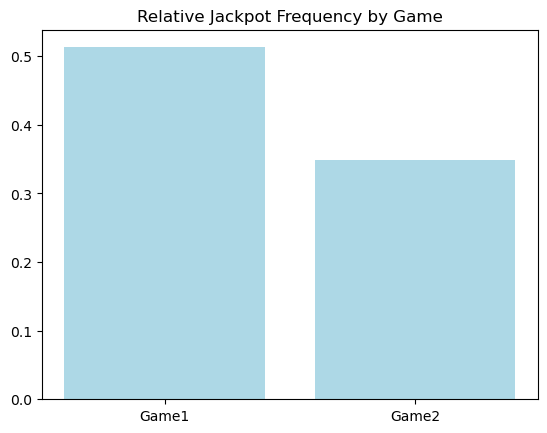

In [26]:
import matplotlib.pyplot as plt

xs = ['Game1', 'Game2']
ys = [jackpot_freq1, jackpot_freq2]

plt.bar(xs, ys, align='center', color='lightblue')
plt.title("Relative Jackpot Frequency by Game")

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [27]:
die1 = montecarlo.Die(faces=np.array([1,2,3,4,5,6]))
die2 = montecarlo.Die(faces=np.array([1,2,3,4,5,6]))
die3 = montecarlo.Die(faces=np.array([1,2,3,4,5,6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [28]:
die1.change_weight(face=6, weight=5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [30]:
die3.change_weight(face=1, weight=5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [33]:
dlist4 = [die2, die2, die2, die2, die2]

game4 = montecarlo.Game(dlist4)
game4.play(times=10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [35]:
dlist5 = [die1, die3, die2, die2, die2]

game5 = montecarlo.Game(dlist5)
game5.play(times=10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

Text(0.5, 1.0, 'Relative Jackpot Frequency by Game')

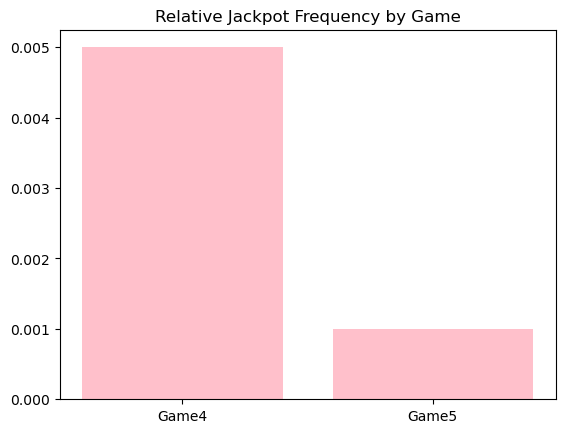

In [46]:
ana4 = montecarlo.Analyzer(game4)
ana5 = montecarlo.Analyzer(game5)

jackpot_freq4 = ana4.jackpot()/1000
jackpot_freq5 = ana5.jackpot()/1000

xs = ['Game4', 'Game5']
ys = [jackpot_freq4, jackpot_freq5]

plt.bar(xs, ys, align='center', color='pink')
plt.title("Relative Jackpot Frequency by Game")


## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [5]:
#inporting letters and formatting
import pandas as pd

letters_df = pd.read_csv('./etc/english_letters.txt',sep=" ", header=None)
letters = letters_df[0].to_list()
weights = letters_df[1].to_list()

In [6]:
#creating alphabet die with weights
alpha = montecarlo.Die(faces=np.array(letters))

for k,v in zip(letters,weights):
    alpha.change_weight(face=k, weight=v)

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [7]:
dlist6 = [alpha, alpha, alpha, alpha]

game6 = montecarlo.Game(dlist6)
game6.play(times=1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [8]:
#getting scrabble words
scrabble = pd.read_csv("./etc/scrabble_words.txt", header=None)
vocab = scrabble[0].to_list()

In [16]:
#getting list/cleaning of permutations from perm_counts
ana6 = montecarlo.Analyzer(game6)
perms6 = ana6.perm_count()

perms6 = perms6.reset_index()
perms6['word'] = perms6.apply(lambda x: [x[c] for c in [0,1,2,3]], axis=1)
perms6['word'] = perms6['word'].apply(lambda x: "".join(x))
perm_word6 = perms6['word'].to_list()

union6 = list(set(perm_word6) & set(vocab))
print(f"{len(union6)} of the permuatations in game6 are actual English words.")


64 of the permuatations in game6 are actual English words.


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [17]:
#creating new game
dlist7 = [alpha, alpha, alpha, alpha, alpha]

game7 = montecarlo.Game(dlist7)
game7.play(times=1000)

In [20]:
#getting list/cleaning of permutations from perm_counts
ana7 = montecarlo.Analyzer(game7)
perms7 = ana7.perm_count()

perms7 = perms7.reset_index()
perms7['word'] = perms7.apply(lambda x: [x[c] for c in [0,1,2,3,4]], axis=1)
perms7['word'] = perms7['word'].apply(lambda x: "".join(x))
perm_word7 = perms7['word'].to_list()

union7 = list(set(perm_word7) & set(vocab))

if len(union7) > len(union6):
    print(f"Game7 created {len(union7)} actual words. Game6 created {len(union6)} actual words. Game7 with five dice produced the most words.")
else:
    print(f"Game7 created {len(union7)} actual words. Game6 created {len(union6)} actual words. Game6 with four dice produced the most words.")

Game7 created 11 actual words. Game6 created 64 actual words. Game6 with four dice produced the most words.


# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.